In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('./cars.csv')

In [8]:
df.drop(columns=['Unnamed: 0','generation_name'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        117927 non-null  object
 1   model       117927 non-null  object
 2   year        117927 non-null  int64 
 3   mileage     117927 non-null  int64 
 4   vol_engine  117927 non-null  int64 
 5   fuel        117927 non-null  object
 6   city        117927 non-null  object
 7   province    117927 non-null  object
 8   price       117927 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.1+ MB


In [11]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [12]:
df = df[df['province'] != '(']

In [13]:
df['fuel'].unique()

array(['Diesel', 'CNG', 'Gasoline', 'LPG', 'Hybrid', 'Electric'],
      dtype=object)

In [14]:
target = df['price']

In [15]:
df.reset_index(drop=True)

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...
117921,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117922,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117923,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117924,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [16]:
df.describe()

,year,mileage,vol_engine,price
count,117926.000000,1.179260e+05,117926.000000,1.179260e+05
mean,2012.925250,1.409764e+05,1812.056205,7.029995e+04
std,5.690158,9.236964e+04,643.615939,8.482493e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462685e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [17]:
df.to_csv("cleaned_cars.csv")

Model

In [18]:
df

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [19]:
import seaborn as snb

<Axes: xlabel='price', ylabel='Count'>

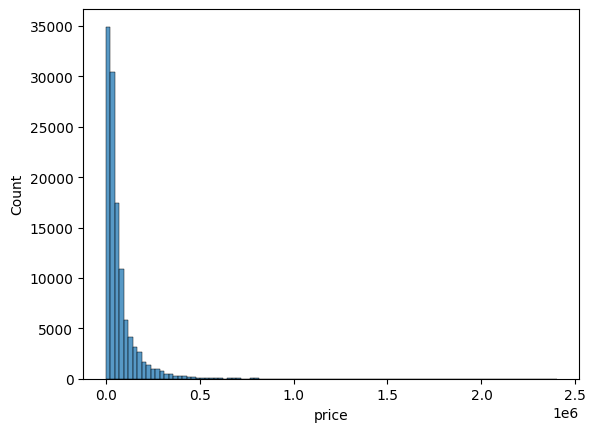

In [20]:
snb.histplot(x = df['price'], bins=100)

In [55]:
X = df.drop(columns=['price','province'])

In [56]:
y = df['price']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [59]:
X_train

,mark,model,year,mileage,vol_engine,fuel,city
14631,audi,a4,2002,240000,1781,Gasoline,Elbląg
102924,nissan,juke,2014,166000,1598,Gasoline,Gliwice
100681,mini,cooper,2021,1,1499,Gasoline,Kraków
90467,hyundai,i30,2014,70454,1396,Gasoline,Kraków
39521,volkswagen,multivan,2022,0,0,Gasoline,Warszawa
...,...,...,...,...,...,...,...
116549,volvo,xc-60,2017,146000,1969,Gasoline,Bochnia
21358,audi,q3,2021,5,1984,Gasoline,Gdańsk
104987,nissan,qashqai,2018,39800,1197,Gasoline,Rzgów
6054,opel,insignia,2014,194000,1956,Diesel,Rzeszów


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe = OneHotEncoder()
ohe.fit(X[['mark','model','fuel','city']])

OneHotEncoder()

In [63]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [64]:
columns_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['mark','model','fuel','city']), remainder='passthrough')

In [66]:
lr = LinearRegression()

In [69]:
pipe = make_pipeline(columns_trans, lr)

In [70]:
ohe.categories_

[array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'citroen', 'fiat',
        'ford', 'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz',
        'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault',
        'seat', 'skoda', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['147', '159', '2', '2008', '206', '207', '208', '3', '3008', '307',
        '308', '3gt', '407', '5', '500', '5008', '500l', '500x', '508',
        '5gt', '6', '80', 'a-klasa', 'a1', 'a2', 'a3', 'a4', 'a4-allroad',
        'a5', 'a6', 'a6-allroad', 'a7', 'a8', 'accord', 'adam', 'agila',
        'alhambra', 'almera', 'altea', 'altea-xl', 'amarok', 'amg-gt',
        'ampera', 'antara', 'arkana', 'arona', 'arteon', 'astra', 'asx',
        'ateca', 'auris', 'avensis', 'aveo', 'aygo', 'b-klasa', 'b-max',
        'beetle', 'berlingo', 'bravo', 'c-hr', 'c-klasa', 'c-max',
        'c3-aircross', 'c3-picasso', 'c30', 'c4-cactus',
        'c4-grand-picasso', 'c4-picasso', 'c5', 'c5-aircross', 'caddy',
        '

In [79]:
X_train

,mark,model,year,mileage,vol_engine,fuel,city
14631,audi,a4,2002,240000,1781,Gasoline,Elbląg
102924,nissan,juke,2014,166000,1598,Gasoline,Gliwice
100681,mini,cooper,2021,1,1499,Gasoline,Kraków
90467,hyundai,i30,2014,70454,1396,Gasoline,Kraków
39521,volkswagen,multivan,2022,0,0,Gasoline,Warszawa
...,...,...,...,...,...,...,...
116549,volvo,xc-60,2017,146000,1969,Gasoline,Bochnia
21358,audi,q3,2021,5,1984,Gasoline,Gdańsk
104987,nissan,qashqai,2018,39800,1197,Gasoline,Rzgów
6054,opel,insignia,2014,194000,1956,Diesel,Rzeszów


In [80]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'citroen', 'fiat',
       'ford', 'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz',
       'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault',
       'seat', 'skoda', 'toyota', 'volkswagen', 'vol...
       'x4', 'x5', 'x5-m', 'x6', 'x6-m', 'x7', 'xc-40', 'xc-60', 'xc-70',
       'xc-90', 'xceed', 'xsara-picasso', 'yaris', 'yeti', 'zafira',
       'zoe'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'Gasoline', 'Hybrid', 'LPG'],
      dtype=object),
                                                                            array(['Adamowizna', 'Adamowo', 'Adamusy', ..., 'Żółwin', 'Żędowice',
       'Żłobin'], dtype=object)]),
                                                  ['mark', 'model', 'fuel',
                                                   'city'])])),
                ('linearregression', LinearRegression())])

In [76]:
predicted = pipe.predict(x_test)

In [77]:
print(r2_score(y_test, predicted))

0.5642083239938013


In [35]:
r2_score_list = []
for i in range(10):
    X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=i)
    pipe.fit(X_train, y_train)
    predicted = pipe.predict(x_test)
    result = r2_score(y_test, predicted)
    r2_score_list.append((result, i))

    print(i,result)

0 0.5646403385269265
1 0.5662287149896461
2 0.5670922467229077
3 0.5481756186375144
4 0.5679545920984368
5 0.5501135363455061
6 0.5572668844503601
7 0.559596193264756
8 0.5564004036998471
9 0.5664619751834983


In [36]:
sorted(r2_score_list)[len(r2_score_list)-1]

(0.5679545920984368, 4)

In [37]:
print(x_test.iloc[90])
print(y_test.iloc[90])

mark            citroen
model         c4-cactus
year               2017
mileage          108250
vol_engine         1560
fuel             Diesel
city              Konin
Name: 82617, dtype: object
44700


In [38]:
pipe.predict(pd.DataFrame([['nissan','patrol',2000,35000,2953,'Diesel','Rybarzowice']],columns = ['mark','model','year','mileage','vol_engine','fuel','city']))

array([85380.04637529])

In [39]:
import pickle

In [40]:
pickle.dump(pipe, open("LinearRegression.pkl","wb"))

MEthod 2 : only selecting numerical columns

In [41]:
numeric_df = df[['year','mileage','vol_engine']]
target = df['price']

In [42]:
X_train, x_test, y_train, y_test = train_test_split(numeric_df, target, test_size=0.3, random_state=639)

In [43]:
numeric_lr = LinearRegression()

In [44]:
numeric_lr.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = numeric_lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.5633748650872236


In [46]:
pickle.dump(numeric_lr, open("LinearRegression2.pkl","wb"))

In [47]:
numeric_lr.predict(X_train.head(1))[0]

81701.69420889392